In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found here.

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

In [165]:
df = pd.read_csv("/content/data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


In [166]:
df['location_full'].nunique()

106

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025_rank                       1503 non-null   string 
 1   2024_rank                       1482 non-null   string 
 2   institution_name                1503 non-null   string 
 3   location                        1503 non-null   string 
 4   location_full                   1503 non-null   string 
 5   size                            1503 non-null   string 
 6   academic_reputation             1503 non-null   Float64
 7   employer_reputation             1503 non-null   Float64
 8   faculty_student                 1503 non-null   Float64
 9   citations_per_faculty           1503 non-null   Float64
 10  international_faculty           1403 non-null   Float64
 11  international_students          1445 non-null   Float64
 12  international_research_network  15

In [168]:
df.loc[df['qs_overall_score']=='-', 'qs_overall_score'] = '0.0'
df['qs_overall_score'] = df['qs_overall_score'].astype(float)

In [169]:
scores = df[['academic_reputation',
    'employer_reputation',
    'faculty_student',
    'citations_per_faculty',
    'international_faculty',
    'international_students',
    'international_research_network',
    'employment_outcomes',
    'sustainability']]

In [170]:
df_acad_sort=df.sort_values(by=['academic_reputation'], ascending=False)
df_acarep=df_acad_sort.loc[(df_acad_sort['academic_reputation'] >= 80) & (df_acad_sort['academic_reputation'] <=100)]
df_acarep

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100.0
5,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,96.1
32,32,28,The University of Tokyo,JP,Japan,L,100.0,99.8,89.3,57.3,10.1,29.7,87.4,99.9,98.3,82.1
41,42,29,"University of California, Los Angeles (UCLA)",US,United States,XL,100.0,99.8,35.4,74.0,42.2,22.3,95.5,94.7,67.1,79.8
11,12,10,"University of California, Berkeley (UCB)",US,United States,XL,100.0,100.0,23.5,98.2,91.5,61.0,97.2,98.4,100.0,90.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,76,Yonsei University,KR,South Korea,L,81.5,97.0,84.2,44.1,20.7,51.2,78.7,87.8,88.9,72.9
46,47,60,The Hong Kong University of Science and Techno...,HK,Hong Kong SAR,M,81.1,50.3,56.7,99.7,100.0,95.4,46.7,65.4,77.6,77.1
132,133,154,Alma Mater Studiorum - University of Bologna,IT,Italy,XL,80.8,47.8,3.7,46.6,14.5,12.3,96.0,53.8,88.4,54.1
131,132,134,Sapienza University of Rome,IT,Italy,XL,80.7,48.5,5.0,45.3,3.1,8.0,97.1,88.0,72.3,54.2


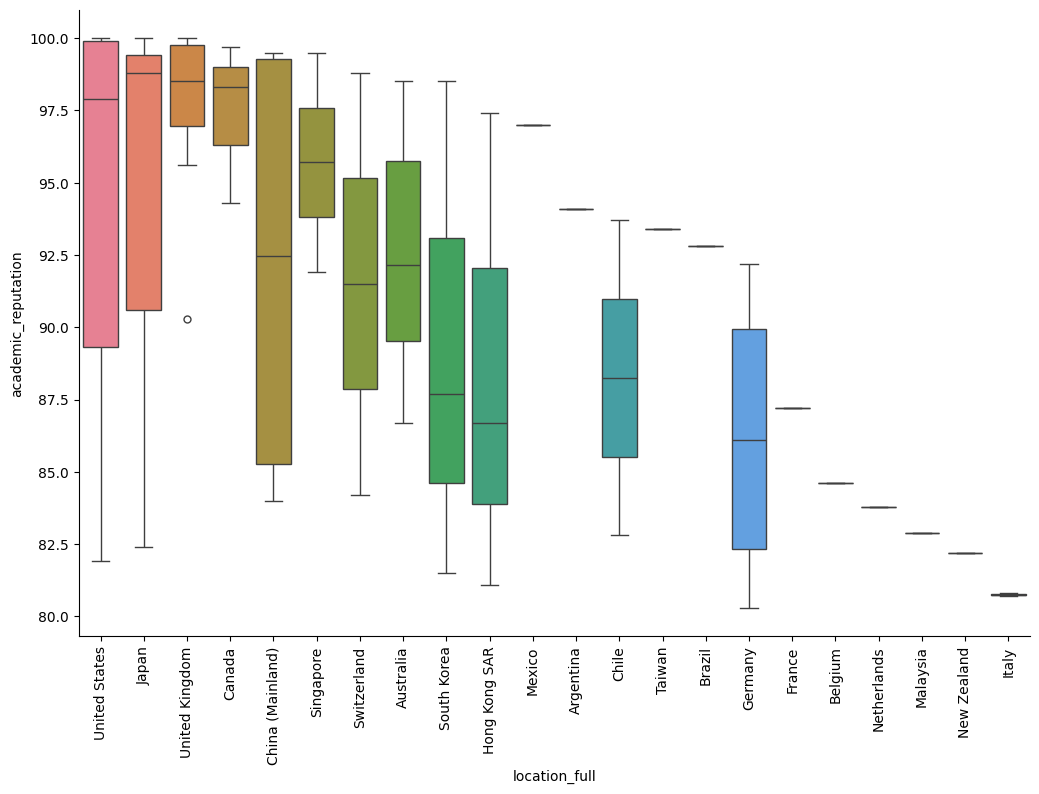

In [171]:
df_acarep['location_full'].nunique()
box_acarep=sns.catplot(x="location_full", y="academic_reputation", data=df_acarep, kind="box", height=7, aspect=1.5, col_order=df_acarep['academic_reputation'].sort_values(), hue="location_full")
plt.xticks(rotation=90)
box_acarep

The next plot shows a strong correlation between sustainability score and the size of the school.

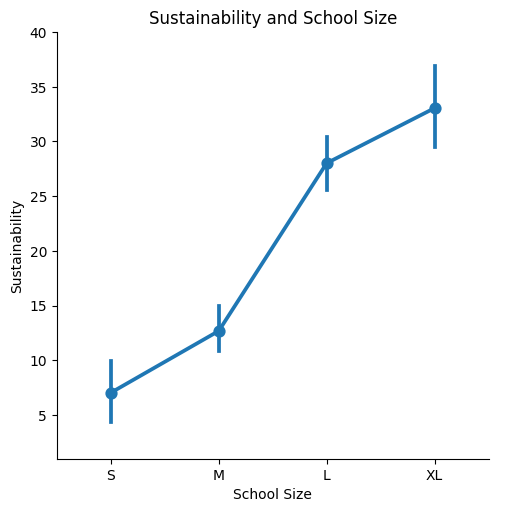

In [172]:
size_order = ["S", "M", "L", "XL"]
sns.catplot(x='size', y='sustainability', data=df, kind='point', order=size_order,)
plt.title('Sustainability and School Size')
plt.xlabel('School Size')
plt.ylabel('Sustainability')
plt.ylim(1, 40)
plt.show()

In [173]:
df['is_us'] = df['location_full'].str.contains('United States')
df['is_int']= df['location_full'].str.contains('United States') == False

<Axes: xlabel='is_int', ylabel='employer_reputation'>

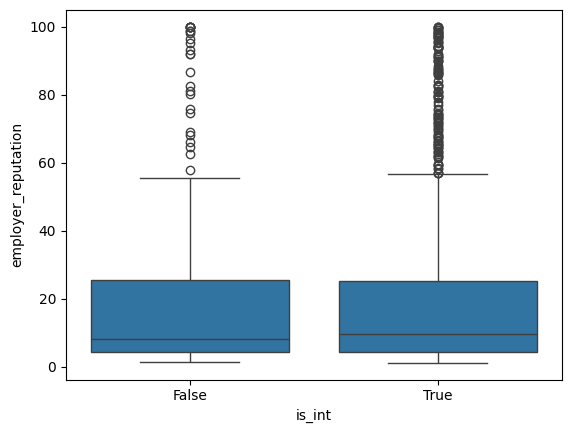

In [174]:
sns.boxplot(x='is_int', y='employer_reputation', data=df)

<Axes: xlabel='academic_reputation', ylabel='employer_reputation'>

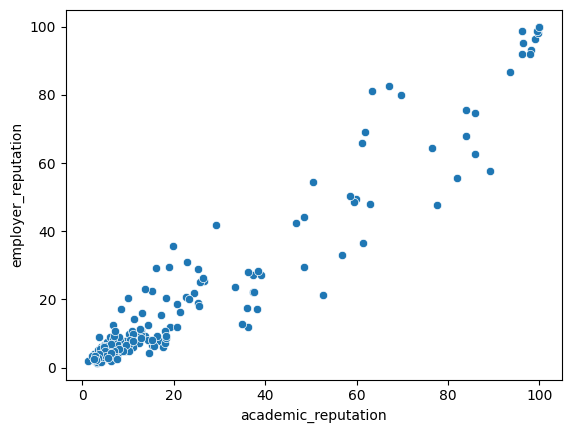

In [175]:
US_schools=df['location_full']=='United States'
sns.scatterplot(x='academic_reputation', y='employer_reputation', data=df[US_schools])

<Axes: >

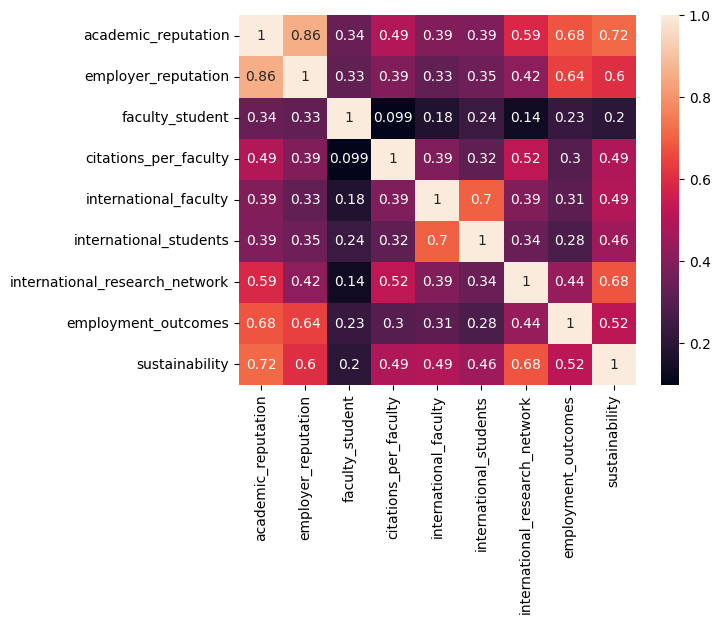

In [176]:
scores = scores.replace('NAType', np.nan).astype(float)
score_heat_map = scores.corr()

sns.heatmap(score_heat_map, annot=True)